# Where are the housing bubbles in the United States?
### The Prediction of U.S. Regional Housing Price 

### Group members:
* Hsiang Huang (hh2410@nyu.edu)
* Tatsuya Ozaki (to855@nyu.edu)
* Xiangjin Lyu (xl2914@nyu.edu)

### Contents:
* Introduction
* Literature Review
* Data
* Machine Learning Prediction
* Conclusion and Discussion
* References

# 1. Introduction

As the last financial crisis shows, the housing boom and bust have significant impacts on the real economy. Currently, U.S. housing price (S&P Case Shiller House Price index) has exceeded the level of that before the financial crisis. Of course, during this period, since economy has recovered and grown steadily, this does not indicate the housing bubble immediately. However, as the renowned research by Mian and Sufi (2014) shows, there was a significant heterogeneity in housing price during the boom and bust. 

Thus, it is imperative for us to monitor the housing price region by region carefully. We establish a model to predict the fair housing value based on the detailed regional U.S. data. The method we exploit is machine learning technique: least absolute shrinkage and selection operator; also Lasso or LASSO). The predicted city-level housing price shows which explanatory variables affect it, such as regional unemployment rate, income, number of stores, crime rate, time spent for commuting work, etc. The important aspect of our model is that it only contains current real variables shown above as explanatory variables, and hence does not have the component of human expectation. Housing boom is always caused by the expectation: if many people expect the housing price will continue to rise, housing price tends to go up. The results show us the regions that are relatively over or under evaluated compared to the model prediction, which only contains real variables.

There are quite considerable studies focusing on studying the application of statistics in the house price market (Khalid et al., 2015; Mohamed et al., 2016; Rusiman et al., 2017). Here, Lasso regression model is constructed to predict the house price in the city-level data of the United State which is shown by Calhoun (2001) could improve the development of the real estate market and provide the relevant information to policymakers and financial markets.

# 2. Literature Review

LASSO is mainly used as powerful shrinkage method to select the variables with high predicting power. It is widely incorporated in the methodology in various fields (Collins et al. 2019). In the field of real estate market specifically, LASSO has been used in the model building (Plakandaras, et al., 2015) and model comparisons (Risse and Kern, 2016). For the housing price prediction, for example, Xin and Khalid (2018) used LASSO to determine the relationship between different housing price indices. They identified the variables with predictability such as house size, age of house, condition of house and also the location of the house. However, there is little research using micro-level data to investigate the housing price prediction. Lu, et al. (2017) proposed a hybrid Lasso and Gradient boosting regression model to predict individual house price, and identified relevant characteristics including location, house type, size, built year, and local amenities. Besides, in this concrete field, the house price is thought to be a multidimensional study in factors generating great influence on the pricing (Mak et al. 2010). That is, since the relationship between all explanatory variables will be complex and even multicollinear, it usually causes the serious problem when regression analysis refers to high dimensional data. However, Lasso regression is qualified to be used to cope the multicollinearity problem (Pasha et al. 2004, Meinshausen et al. 2006).

The innovation of our research lies in adopting LASSO to predict the housing market using city-level data, with variables spanning from economic, social, and demographic data. Lu et al. (2017) suggested the future research could include possible candidate variables including income, salary, population, local amenities, cost of living, annual property tax, school, crime, marketing data, which we can access in the PolicyMap GIS and include in our analysis. 

Another innovation is that we tend to use the cross-section data in the prediction process. Cranfield, et al. (2003) has investigated performances of different prediction models with cross section data. There is limited literature using cross sectional data to predict in the housing market. To sum up, the result of our project could shed light on the field in housing market research, with novel methodology and data.

# 3. Data

## 3.1 Data Source

We get all the possible candidate variables including income, salary, population, local amenities, cost of living, annual property tax, school, crime, marketing data from PolicyMap GIS. The detailed information is available at https://www.policymap.com/. This website compiles the major statistics in U.S. such as American Community Survey (ACS) and The Bureau of Labor Statistics'Local Area Unemployment Statistics etc with detailed regional information which can be accessed at https://www.policymap.com/data/our-data/.

The dependent variable is city-level median value of owner-occupied home, which is estimated value between 2014-2018 released by ACS. In terms of the explanatory variables, estimated or observed periods for some of them are differ from 2014-2018. In these cases, we pick the closest year to midpoint of 2014-2018, namely 2016. These examples are "n_job_change", "startup_firm", "large_firm", and "small_firm". If the data in year 2016 are unavailable, we extend the estimated or observed period to closest point between 2014-2018 such as "foreign_born". Moreover, we use the variable "Number of parks within a 10 minute walk (park)" in year 2019, since geographical information like this will not change radically in a few years.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#The name transformation
df= pd.read_csv("C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\datanamelist.csv")
pd.set_option("max_colwidth",200)
dfStyler = df.style.set_properties(**{'text-align': 'left'})
dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
dfStyler

,var name (after change),Original name
0,density,Estimated number of people per square mile
1,men,Estimated percent of all people who were men
2,white,Estimated percent of all people who were White
3,black,Estimated percent of all people who were Black or African American
4,asian,Estimated percent of all people who were Asian
5,latino,Estimated percent of all people who were Hispanic or Latino
6,non_eng,Estimated percent of all people age 5 and older who were non-English speaker
7,veteran,Percent of civilians age 18 and older who are veterans
8,foreign_born,Estimated percent of all people who were foreign born as of 2014
9,instate_born,Estimated percent of all people who were born in their state of residence


## 3.2 Data Cleaning

Here, we read the explanatory variables in the folder named after "x_data" at once using command "glob" and change the list to array.

In [3]:
import glob

In [4]:
folda_list = glob.glob("C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\x_data\\*")
folda_list

['C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\x_data\\Age.csv',
 'C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\x_data\\associate_degree.csv',
 'C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\x_data\\Average annual dollars spent out of pocket per person on medical care.csv',
 'C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\x_data\\Estimated average annual amount spent per household on housing expense.csv',
 'C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\x_data\\Estimated average size of a household.csv',
 'C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\x_data\\Estimated average travel time to work in minutes.csv',
 'C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\x_data\\Estimated median income of a household.csv',
 'C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\x_data\\Estimated median year a housing.csv',
 'C:\\Users\\hsi

In [5]:
folda_np = np.array(folda_list)
folda_np

array(['C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\x_data\\Age.csv',
       'C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\x_data\\associate_degree.csv',
       'C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\x_data\\Average annual dollars spent out of pocket per person on medical care.csv',
       'C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\x_data\\Estimated average annual amount spent per household on housing expense.csv',
       'C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\x_data\\Estimated average size of a household.csv',
       'C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\x_data\\Estimated average travel time to work in minutes.csv',
       'C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\x_data\\Estimated median income of a household.csv',
       'C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\x_data\\Estima

Next, we read the response variable (Median Housing value) in the folder "y_data" and merge the explanatory variables into this data frame.

In [6]:
df = pd.read_csv("C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\y_data\\Median Home Value.csv")
for i in folda_np:
    temp_df = pd.read_csv(i,encoding="shift-jis")
    temp_df = temp_df.iloc[:,[1, 3]]
    df = df.merge(temp_df,on='FIPS Code',how='outer')
    df = df.iloc[:30000,]
df

,City,FIPS Code,Formatted FIPS,home_value,age,associate degree,expense_medicare,expense_house,house_ppl,time_to_work,...,large_firm,small_firm,kitchen,plumbing,damaged_house,walk_to_work,publictransp_to_work,drive_to_work,percent_ppl_unemployment,poorly_educated
0,Sitka,270540.0,270540.0,349300.0,39.0,32.99,770.0,20900.0,2.37,11.0,...,30.95,40.18,97.25,98.62,0.44,15.90,1.02,72.33,4.35,1.64
1,Juneau,236400.0,236400.0,344000.0,38.0,36.20,770.0,23500.0,2.53,16.0,...,34.97,41.47,99.10,99.05,0.96,6.34,5.04,82.34,5.75,1.11
2,Wrangell,286380.0,286380.0,212600.0,50.0,30.03,880.0,18900.0,2.26,10.0,...,29.93,46.67,96.93,96.65,2.04,13.46,0.66,67.96,5.61,3.25
3,Anchorage,203000.0,203000.0,308000.0,33.0,34.72,660.0,23100.0,2.71,19.0,...,51.84,28.31,99.23,99.31,1.21,3.09,1.57,87.90,5.64,2.45
4,Prudhoe Bay,264380.0,264380.0,NaN,49.0,36.53,840.0,NaN,NaN,NaN,...,74.70,1.35,NaN,NaN,NaN,71.74,2.85,24.67,0.00,0.72
5,Healy,232150.0,232150.0,232700.0,44.0,37.19,690.0,23200.0,2.69,NaN,...,41.61,57.72,80.90,81.70,6.44,11.51,1.39,81.35,3.90,0.00
6,Willow,285280.0,285280.0,198400.0,37.0,40.74,710.0,19400.0,2.99,42.0,...,5.65,90.40,92.24,87.02,10.85,0.00,0.00,68.32,7.94,3.61
7,Deltana,218675.0,218675.0,230900.0,37.0,39.32,730.0,22000.0,3.29,NaN,...,4.97,12.43,95.09,96.73,3.77,1.39,0.00,90.74,10.22,4.88
8,Petersville,260460.0,260460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Mendeltna,248200.0,248200.0,NaN,NaN,65.38,NaN,NaN,NaN,NaN,...,NaN,NaN,100.00,34.62,0.00,NaN,NaN,NaN,NaN,0.00


In order to avoid serious multicollinearity problem, we dropped some variables with high correlation manually. Our thought process is as follows. Based on the correlation matrix listed in 3.3, we look up the variables that are highly correlated with each other (typically over 0.8). After identifying those candidates, we select the one that maintains the interpretability and economic implications. The dropped variables and their representatives are lists below:
* 'inc' represents 'expense_house','house_median_inc','real_estate_tax','house_inc_75k','manage_job'
* 'park' represents 'house_num'
* 'computer' represents 'internet'
* 'expense_medicare' represents 'medical_care'
* 'sanp' represents 'families_food subsidy','poverty' 
* 'time_to_work' represents 'drive_to_work'
* 'small_firm' represents 'large_firm' 
* 'elec_heat' represents 'gas_heat','no_fuel_heat' 
* 'built_year' represents 'housing_unit_change'
* 'foreign_born' represents 'instate_born'
* Noted that we do not drop 'home_value' as it is dependent variable that is going to predict even it is also highly correlated to 'inc'. 'white' and 'black' are also highly correlated; however, to provide comprehensive results, we choose to keep them in our estimation. 

In [7]:
df = df.drop(columns=['expense_house','house_median_inc','house_num','internet',
                      'medical_care','families_food subsidy','poverty','real_estate_tax',
                      'house_inc_75k','drive_to_work','large_firm','gas_heat','no_fuel_heat',
                      'housing_unit_change','instate_born','manage_job']) 
df

,City,FIPS Code,Formatted FIPS,home_value,age,associate degree,expense_medicare,house_ppl,time_to_work,built_year,...,elec_heat,startup_firm,small_firm,kitchen,plumbing,damaged_house,walk_to_work,publictransp_to_work,percent_ppl_unemployment,poorly_educated
0,Sitka,270540.0,270540.0,349300.0,39.0,32.99,770.0,2.37,11.0,1979.0,...,41.31,8.00,40.18,97.25,98.62,0.44,15.90,1.02,4.35,1.64
1,Juneau,236400.0,236400.0,344000.0,38.0,36.20,770.0,2.53,16.0,1981.0,...,30.07,6.93,41.47,99.10,99.05,0.96,6.34,5.04,5.75,1.11
2,Wrangell,286380.0,286380.0,212600.0,50.0,30.03,880.0,2.26,10.0,1977.0,...,48.51,2.37,46.67,96.93,96.65,2.04,13.46,0.66,5.61,3.25
3,Anchorage,203000.0,203000.0,308000.0,33.0,34.72,660.0,2.71,19.0,1981.0,...,15.44,5.40,28.31,99.23,99.31,1.21,3.09,1.57,5.64,2.45
4,Prudhoe Bay,264380.0,264380.0,NaN,49.0,36.53,840.0,NaN,NaN,NaN,...,NaN,0.57,1.35,NaN,NaN,NaN,71.74,2.85,0.00,0.72
5,Healy,232150.0,232150.0,232700.0,44.0,37.19,690.0,2.69,NaN,1990.0,...,6.37,4.03,57.72,80.90,81.70,6.44,11.51,1.39,3.90,0.00
6,Willow,285280.0,285280.0,198400.0,37.0,40.74,710.0,2.99,42.0,1997.0,...,3.53,10.73,90.40,92.24,87.02,10.85,0.00,0.00,7.94,3.61
7,Deltana,218675.0,218675.0,230900.0,37.0,39.32,730.0,3.29,NaN,1988.0,...,1.13,4.70,12.43,95.09,96.73,3.77,1.39,0.00,10.22,4.88
8,Petersville,260460.0,260460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Mendeltna,248200.0,248200.0,NaN,NaN,65.38,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,100.00,34.62,0.00,NaN,NaN,NaN,0.00


Now, we merge the data for longitude and latitude to draw a map. We downloaded the city-level longitude and latitude data from the following website: https://simplemaps.com/data/us-cities. One problem to merge the data is that there are exactly same city names as the next two examples show. Thus, we have to merge the two datasets using the column name "city_county_code" in the "df_long_lati".

In [8]:
df_long_lati =  pd.read_excel("C:\\Users\\hsian\\iCloudDrive\\_20 python\\Project\\Final version\\long_lati.xlsx")
df_long_lati

,city,state_id,county_fips,lat,lng,text,county_2 digit code,city_county_code
0,Aaronsburg,PA,42027,40.9042,-77.4513,42027,42,Aaronsburg42
1,Abanda,AL,1017,33.0926,-85.5253,1017,1,Abanda01
2,Abbeville,LA,22113,29.9750,-92.1266,22113,22,Abbeville22
3,Abbeville,AL,1067,31.5664,-85.2528,1067,1,Abbeville01
4,Abbeville,GA,13315,31.9925,-83.3068,13315,13,Abbeville13
5,Abbeville,MS,28071,34.5034,-89.5025,28071,28,Abbeville28
6,Abbeville,SC,45001,34.1787,-82.3774,45001,45,Abbeville45
7,Abbotsford,WI,55019,44.9433,-90.3163,55019,55,Abbotsford55
8,Abbott,TX,48217,31.8870,-97.0800,48217,48,Abbott48
9,Abbottstown,PA,42001,39.8843,-76.9888,42001,42,Abbottstown42


In [9]:
df.loc[df['City']=='Juneau',]

,City,FIPS Code,Formatted FIPS,home_value,age,associate degree,expense_medicare,house_ppl,time_to_work,built_year,...,elec_heat,startup_firm,small_firm,kitchen,plumbing,damaged_house,walk_to_work,publictransp_to_work,percent_ppl_unemployment,poorly_educated
1,Juneau,236400.0,236400.0,344000.0,38.0,36.20,770.0,2.53,16.0,1981.0,...,30.07,6.93,41.47,99.1,99.05,0.96,6.34,5.04,5.75,1.11
14559,Juneau,5538675.0,5538675.0,131300.0,43.0,29.96,620.0,2.54,19.0,1963.0,...,16.61,12.32,37.86,100.0,100.00,0.00,3.47,0.27,8.94,4.29


In [10]:
df.loc[df['City']=='Abbeville',]

,City,FIPS Code,Formatted FIPS,home_value,age,associate degree,expense_medicare,house_ppl,time_to_work,built_year,...,elec_heat,startup_firm,small_firm,kitchen,plumbing,damaged_house,walk_to_work,publictransp_to_work,percent_ppl_unemployment,poorly_educated
2898,Abbeville,100124.0,100124.0,85400.0,47.0,27.90,850.0,2.42,NaN,1969.0,...,86.71,1.87,39.49,98.59,98.59,0.00,1.22,0.00,6.29,6.83
6950,Abbeville,4500100.0,4500100.0,84600.0,43.0,25.35,750.0,2.27,19.0,1963.0,...,60.48,3.55,28.64,100.00,100.00,0.00,4.11,0.66,17.57,7.15
7581,Abbeville,2200100.0,2200100.0,86800.0,36.0,21.41,660.0,2.66,26.0,1968.0,...,48.79,4.60,47.52,99.05,99.05,2.69,5.62,0.00,12.30,9.56
10793,Abbeville,2800100.0,2800100.0,121900.0,40.0,31.23,760.0,2.95,NaN,1978.0,...,51.49,5.88,61.76,100.00,100.00,0.00,0.00,0.68,0.68,5.95
12148,Abbeville,1300184.0,1300184.0,34000.0,39.0,21.50,190.0,2.34,NaN,1983.0,...,84.74,0.00,34.12,100.00,100.00,0.00,0.95,0.00,2.31,7.01


Thus, to merge the "df" and "long_lati_data", we have to properly change the city name in "df" dataset. Here, we use the first two digits of FIPS code to creat the same name as "city_county_code" in the "df_long_lati". In this process, we have to add "0" to some FIPS code, since they only have 6 digits excluding the dicimal points, while the other have 7 digits.

In [11]:
df['FIPS Code'] = df['FIPS Code'].astype('str')
FIPS_list = list(df['FIPS Code'])
FIPS_list

['270540.0',
 '236400.0',
 '286380.0',
 '203000.0',
 '264380.0',
 '232150.0',
 '285280.0',
 '218675.0',
 '260460.0',
 '248200.0',
 '270870.0',
 '214000.0',
 '259320.0',
 '3001675.0',
 '244580.0',
 '278680.0',
 '219720.0',
 '3011397.0',
 '248540.0',
 '211690.0',
 '274350.0',
 '242820.0',
 '231765.0',
 '270930.0',
 '282200.0',
 '1235000.0',
 '228590.0',
 '266470.0',
 '264820.0',
 '4055000.0',
 '280100.0',
 '246560.0',
 '238910.0',
 '277690.0',
 '223720.0',
 '4835000.0',
 '254480.0',
 '274340.0',
 '226100.0',
 '3651000.0',
 '212350.0',
 '252940.0',
 '5182000.0',
 '249530.0',
 '4752006.0',
 '251960.0',
 '225880.0',
 '455000.0',
 '644000.0',
 '201390.0',
 '220020.0',
 '278350.0',
 '261788.0',
 '5176432.0',
 '277800.0',
 '245790.0',
 '214880.0',
 '239630.0',
 '4817000.0',
 '1836003.0',
 '4865000.0',
 '280770.0',
 '213450.0',
 '265800.0',
 '210150.0',
 '207070.0',
 '2148006.0',
 '4819000.0',
 '5116000.0',
 '407940.0',
 '2938000.0',
 '285610.0',
 '666000.0',
 '228740.0',
 '272985.0',
 '245700.

In [12]:
FIPS_list_r=[]
for i in FIPS_list:
    if len(i)==8:
        FIPS_list_r.append(("0"+i)[:-7])
    else:
        FIPS_list_r.append((i)[:-7])
FIPS_list_r

['02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '30',
 '02',
 '02',
 '02',
 '30',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '12',
 '02',
 '02',
 '02',
 '40',
 '02',
 '02',
 '02',
 '02',
 '02',
 '48',
 '02',
 '02',
 '02',
 '36',
 '02',
 '02',
 '51',
 '02',
 '47',
 '02',
 '02',
 '04',
 '06',
 '02',
 '02',
 '02',
 '02',
 '51',
 '02',
 '02',
 '02',
 '02',
 '48',
 '18',
 '48',
 '02',
 '02',
 '02',
 '02',
 '02',
 '21',
 '48',
 '51',
 '04',
 '29',
 '02',
 '06',
 '02',
 '02',
 '02',
 '02',
 '02',
 '48',
 '02',
 '02',
 '47',
 '02',
 '02',
 '02',
 '02',
 '22',
 '32',
 '02',
 '21',
 '37',
 '02',
 '13',
 '02',
 '02',
 '17',
 '02',
 '48',
 '02',
 '32',
 '27',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '39',
 '02',
 '06',
 '04',
 '02',
 '02',
 '02',
 '02',
 '02',
 '48',
 '02',
 '13',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '08',
 '32',
 '04',
 '02',
 '53',
 '02',
 '01',
 '13',
 '40',
 '02',
 '02',
 '06',
 '02',
 '02',
 '02',

In [13]:
df['FIPS_list_r']=FIPS_list_r
df

,City,FIPS Code,Formatted FIPS,home_value,age,associate degree,expense_medicare,house_ppl,time_to_work,built_year,...,startup_firm,small_firm,kitchen,plumbing,damaged_house,walk_to_work,publictransp_to_work,percent_ppl_unemployment,poorly_educated,FIPS_list_r
0,Sitka,270540.0,270540.0,349300.0,39.0,32.99,770.0,2.37,11.0,1979.0,...,8.00,40.18,97.25,98.62,0.44,15.90,1.02,4.35,1.64,02
1,Juneau,236400.0,236400.0,344000.0,38.0,36.20,770.0,2.53,16.0,1981.0,...,6.93,41.47,99.10,99.05,0.96,6.34,5.04,5.75,1.11,02
2,Wrangell,286380.0,286380.0,212600.0,50.0,30.03,880.0,2.26,10.0,1977.0,...,2.37,46.67,96.93,96.65,2.04,13.46,0.66,5.61,3.25,02
3,Anchorage,203000.0,203000.0,308000.0,33.0,34.72,660.0,2.71,19.0,1981.0,...,5.40,28.31,99.23,99.31,1.21,3.09,1.57,5.64,2.45,02
4,Prudhoe Bay,264380.0,264380.0,NaN,49.0,36.53,840.0,NaN,NaN,NaN,...,0.57,1.35,NaN,NaN,NaN,71.74,2.85,0.00,0.72,02
5,Healy,232150.0,232150.0,232700.0,44.0,37.19,690.0,2.69,NaN,1990.0,...,4.03,57.72,80.90,81.70,6.44,11.51,1.39,3.90,0.00,02
6,Willow,285280.0,285280.0,198400.0,37.0,40.74,710.0,2.99,42.0,1997.0,...,10.73,90.40,92.24,87.02,10.85,0.00,0.00,7.94,3.61,02
7,Deltana,218675.0,218675.0,230900.0,37.0,39.32,730.0,3.29,NaN,1988.0,...,4.70,12.43,95.09,96.73,3.77,1.39,0.00,10.22,4.88,02
8,Petersville,260460.0,260460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02
9,Mendeltna,248200.0,248200.0,NaN,NaN,65.38,NaN,NaN,NaN,NaN,...,NaN,NaN,100.00,34.62,0.00,NaN,NaN,NaN,0.00,02


Here, we creat the "City name + FIPS Code (first two digits)" in "df".

In [14]:
#City + Fips code
df['FIPS_list_r'] = df['FIPS_list_r'].astype('str')
df["City_FIPS"] = df['City']+df['FIPS_list_r']
df

,City,FIPS Code,Formatted FIPS,home_value,age,associate degree,expense_medicare,house_ppl,time_to_work,built_year,...,small_firm,kitchen,plumbing,damaged_house,walk_to_work,publictransp_to_work,percent_ppl_unemployment,poorly_educated,FIPS_list_r,City_FIPS
0,Sitka,270540.0,270540.0,349300.0,39.0,32.99,770.0,2.37,11.0,1979.0,...,40.18,97.25,98.62,0.44,15.90,1.02,4.35,1.64,02,Sitka02
1,Juneau,236400.0,236400.0,344000.0,38.0,36.20,770.0,2.53,16.0,1981.0,...,41.47,99.10,99.05,0.96,6.34,5.04,5.75,1.11,02,Juneau02
2,Wrangell,286380.0,286380.0,212600.0,50.0,30.03,880.0,2.26,10.0,1977.0,...,46.67,96.93,96.65,2.04,13.46,0.66,5.61,3.25,02,Wrangell02
3,Anchorage,203000.0,203000.0,308000.0,33.0,34.72,660.0,2.71,19.0,1981.0,...,28.31,99.23,99.31,1.21,3.09,1.57,5.64,2.45,02,Anchorage02
4,Prudhoe Bay,264380.0,264380.0,NaN,49.0,36.53,840.0,NaN,NaN,NaN,...,1.35,NaN,NaN,NaN,71.74,2.85,0.00,0.72,02,Prudhoe Bay02
5,Healy,232150.0,232150.0,232700.0,44.0,37.19,690.0,2.69,NaN,1990.0,...,57.72,80.90,81.70,6.44,11.51,1.39,3.90,0.00,02,Healy02
6,Willow,285280.0,285280.0,198400.0,37.0,40.74,710.0,2.99,42.0,1997.0,...,90.40,92.24,87.02,10.85,0.00,0.00,7.94,3.61,02,Willow02
7,Deltana,218675.0,218675.0,230900.0,37.0,39.32,730.0,3.29,NaN,1988.0,...,12.43,95.09,96.73,3.77,1.39,0.00,10.22,4.88,02,Deltana02
8,Petersville,260460.0,260460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02,Petersville02
9,Mendeltna,248200.0,248200.0,NaN,NaN,65.38,NaN,NaN,NaN,NaN,...,NaN,100.00,34.62,0.00,NaN,NaN,NaN,0.00,02,Mendeltna02


Finally, we merge the "df" and "df_long_lati" data.

In [15]:
df_with_longlati = pd.merge(df,df_long_lati,left_on='City_FIPS',right_on='city_county_code',how='inner')
df_with_longlati 

,City,FIPS Code,Formatted FIPS,home_value,age,associate degree,expense_medicare,house_ppl,time_to_work,built_year,...,FIPS_list_r,City_FIPS,city,state_id,county_fips,lat,lng,text,county_2 digit code,city_county_code
0,Sitka,270540.0,270540.0,349300.0,39.0,32.99,770.0,2.37,11.0,1979.0,...,02,Sitka02,Sitka,AK,2220,57.2401,-135.3153,2220,2,Sitka02
1,Juneau,236400.0,236400.0,344000.0,38.0,36.20,770.0,2.53,16.0,1981.0,...,02,Juneau02,Juneau,AK,2110,58.4546,-134.1739,2110,2,Juneau02
2,Wrangell,286380.0,286380.0,212600.0,50.0,30.03,880.0,2.26,10.0,1977.0,...,02,Wrangell02,Wrangell,AK,2275,56.3317,-132.0223,2275,2,Wrangell02
3,Anchorage,203000.0,203000.0,308000.0,33.0,34.72,660.0,2.71,19.0,1981.0,...,02,Anchorage02,Anchorage,AK,2020,61.1508,-149.1091,2020,2,Anchorage02
4,Prudhoe Bay,264380.0,264380.0,NaN,49.0,36.53,840.0,NaN,NaN,NaN,...,02,Prudhoe Bay02,Prudhoe Bay,AK,2185,70.3128,-148.6957,2185,2,Prudhoe Bay02
5,Healy,232150.0,232150.0,232700.0,44.0,37.19,690.0,2.69,NaN,1990.0,...,02,Healy02,Healy,AK,2068,63.9454,-149.0152,2068,2,Healy02
6,Willow,285280.0,285280.0,198400.0,37.0,40.74,710.0,2.99,42.0,1997.0,...,02,Willow02,Willow,AK,2170,61.8157,-149.7530,2170,2,Willow02
7,Deltana,218675.0,218675.0,230900.0,37.0,39.32,730.0,3.29,NaN,1988.0,...,02,Deltana02,Deltana,AK,2240,63.8724,-145.2158,2240,2,Deltana02
8,Petersville,260460.0,260460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,02,Petersville02,Petersville,AK,2170,62.4227,-150.8441,2170,2,Petersville02
9,Mendeltna,248200.0,248200.0,NaN,NaN,65.38,NaN,NaN,NaN,NaN,...,02,Mendeltna02,Mendeltna,AK,2261,62.1359,-146.5388,2261,2,Mendeltna02


After dropping the rows containing NA value, we get 11,163 samples with the complete data set.

In [16]:
df_with_longlati_R = df_with_longlati.dropna(axis=0,how='any')
df_with_longlati_R

,City,FIPS Code,Formatted FIPS,home_value,age,associate degree,expense_medicare,house_ppl,time_to_work,built_year,...,FIPS_list_r,City_FIPS,city,state_id,county_fips,lat,lng,text,county_2 digit code,city_county_code
0,Sitka,270540.0,270540.0,349300.0,39.0,32.99,770.0,2.37,11.0,1979.0,...,02,Sitka02,Sitka,AK,2220,57.2401,-135.3153,2220,2,Sitka02
1,Juneau,236400.0,236400.0,344000.0,38.0,36.20,770.0,2.53,16.0,1981.0,...,02,Juneau02,Juneau,AK,2110,58.4546,-134.1739,2110,2,Juneau02
2,Wrangell,286380.0,286380.0,212600.0,50.0,30.03,880.0,2.26,10.0,1977.0,...,02,Wrangell02,Wrangell,AK,2275,56.3317,-132.0223,2275,2,Wrangell02
3,Anchorage,203000.0,203000.0,308000.0,33.0,34.72,660.0,2.71,19.0,1981.0,...,02,Anchorage02,Anchorage,AK,2020,61.1508,-149.1091,2020,2,Anchorage02
6,Willow,285280.0,285280.0,198400.0,37.0,40.74,710.0,2.99,42.0,1997.0,...,02,Willow02,Willow,AK,2170,61.8157,-149.7530,2170,2,Willow02
18,Susitna North,274350.0,274350.0,167200.0,50.0,35.62,900.0,2.22,33.0,1997.0,...,02,Susitna North02,Susitna North,AK,2170,62.1281,-149.8593,2170,2,Susitna North02
23,Jacksonville,1235000.0,1235000.0,160900.0,36.0,32.96,690.0,2.57,25.0,1984.0,...,12,Jacksonville12,Jacksonville,FL,12031,30.3322,-81.6749,12031,12,Jacksonville12
27,Oklahoma City,4055000.0,4055000.0,153700.0,34.0,30.57,680.0,2.59,21.0,1979.0,...,40,Oklahoma City40,Oklahoma City,OK,40109,35.4676,-97.5137,40109,40,Oklahoma City40
32,Houston,4835000.0,4835000.0,161300.0,33.0,23.46,590.0,2.67,27.0,1978.0,...,48,Houston48,Houston,TX,48201,29.7869,-95.3905,48201,48,Houston48
36,New York,3651000.0,3651000.0,570500.0,37.0,20.18,650.0,2.62,41.0,1949.0,...,36,New York36,New York,NY,36061,40.6943,-73.9249,36061,36,New York36


## 3.3 Data Description

First, we present the summary statistics table as follows.

In [17]:
df2=df_with_longlati_R.iloc[:, 3:-10].copy()
display(df2.describe())

,home_value,age,associate degree,expense_medicare,house_ppl,time_to_work,built_year,density,inc,snap,...,elec_heat,startup_firm,small_firm,kitchen,plumbing,damaged_house,walk_to_work,publictransp_to_work,percent_ppl_unemployment,poorly_educated
count,1.116300e+04,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,...,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000
mean,2.213298e+05,39.639076,30.457466,781.893756,2.612934,25.885515,1973.086805,2130.514726,31662.780973,12.824525,...,35.251041,9.598873,46.290758,99.238737,99.653183,0.573698,2.442336,2.099522,5.637220,4.326660
std,2.095249e+05,6.745487,7.076715,147.597849,0.403304,6.115766,23.886822,2515.098742,15020.888818,9.812847,...,26.078377,8.771579,23.271864,1.440146,1.309914,1.516711,3.367544,4.415912,3.305588,4.928759
min,1.250000e+04,14.000000,2.960000,170.000000,1.420000,3.000000,18.000000,0.980000,5264.000000,0.000000,...,0.000000,0.000000,0.000000,16.470000,9.410000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.028000e+05,35.000000,26.000000,690.000000,2.340000,22.000000,1961.000000,822.970000,22704.500000,5.155000,...,14.370000,4.505000,28.735000,98.950000,99.600000,0.000000,0.630000,0.000000,3.410000,1.510000
50%,1.563000e+05,39.000000,30.690000,770.000000,2.550000,25.000000,1973.000000,1443.180000,27879.000000,10.810000,...,27.000000,7.430000,40.610000,99.590000,100.000000,0.000000,1.540000,0.440000,5.030000,2.910000
75%,2.585000e+05,43.000000,35.250000,860.000000,2.810000,30.000000,1984.000000,2648.325000,35860.500000,18.420000,...,51.975000,11.760000,60.095000,100.000000,100.000000,0.710000,3.080000,1.965000,7.190000,5.280000
max,2.000001e+06,76.000000,66.670000,1950.000000,5.690000,58.000000,2013.000000,88479.840000,178568.000000,80.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,93.750000,77.060000,61.410000,33.400000,57.820000


Next, we check the density of city-level median house value.  The median house value is skewed to the right and there are not few cities where housing value exceeds 1000000 dollars.

Text(0.5,0,'Home Value')

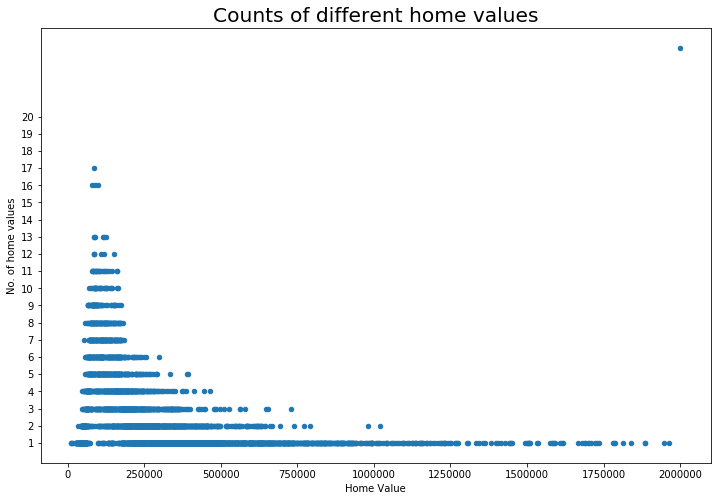

In [18]:
df3=df2["home_value"].value_counts().reset_index()
df3=df3.rename(columns={'home_value':'counts',"index":"home_value"})
df3.plot.scatter(x="home_value",y="counts",figsize=(12,8))
plt.style.use('fivethirtyeight')
plt.title("Counts of different home values")
plt.yticks(np.arange(1,21,1))
plt.ylabel("No. of home values")
plt.xlabel("Home Value")

C:\Users\hsian\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


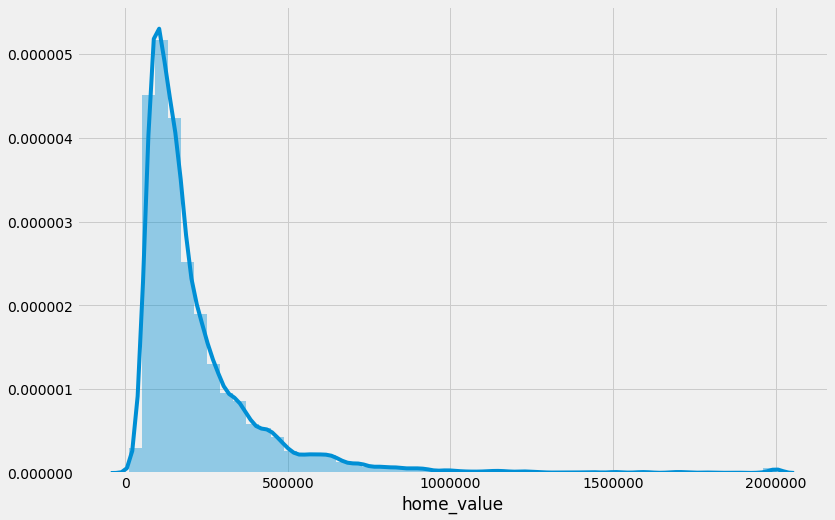

In [19]:
#dist plot
plt.style.use({'figure.figsize':(12, 8)})
sns.distplot(df2["home_value"])

We show the horizontal bar chart of top and bottom 30 cities in the median house price.

Text(0.5,0,'House price (dollars)')

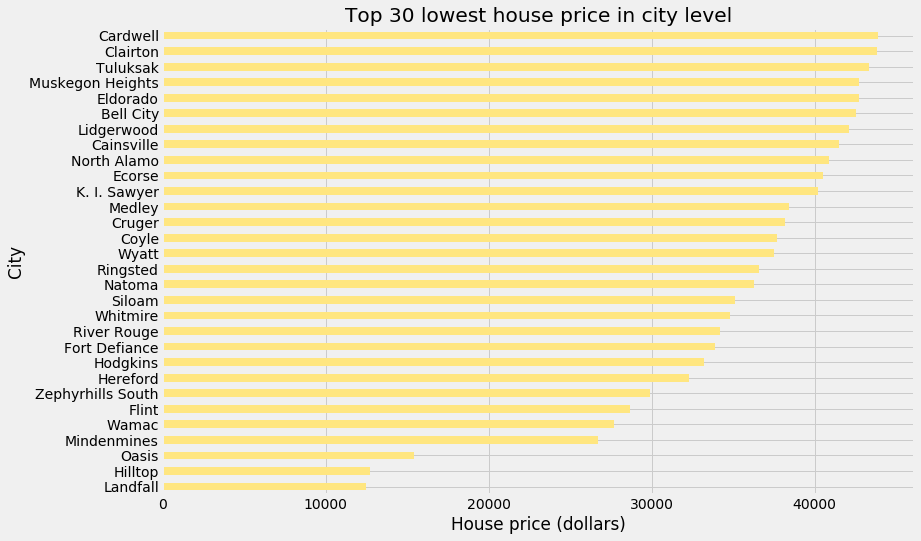

In [20]:
#in city level
homev=df_with_longlati_R.groupby("City")["home_value"].sum()
homev=homev.sort_values().head(30)
plt.style.use({'figure.figsize':(12, 8)})
fig,ax = plt.subplots()
homev.plot.barh(ax=ax,color=(1,0.9,0.5))
ax.set_title('Top 30 lowest house price in city level')
ax.set_ylabel('City')
ax.set_xlabel('House price (dollars)')


Text(0.5,0,'House price (dollars)')

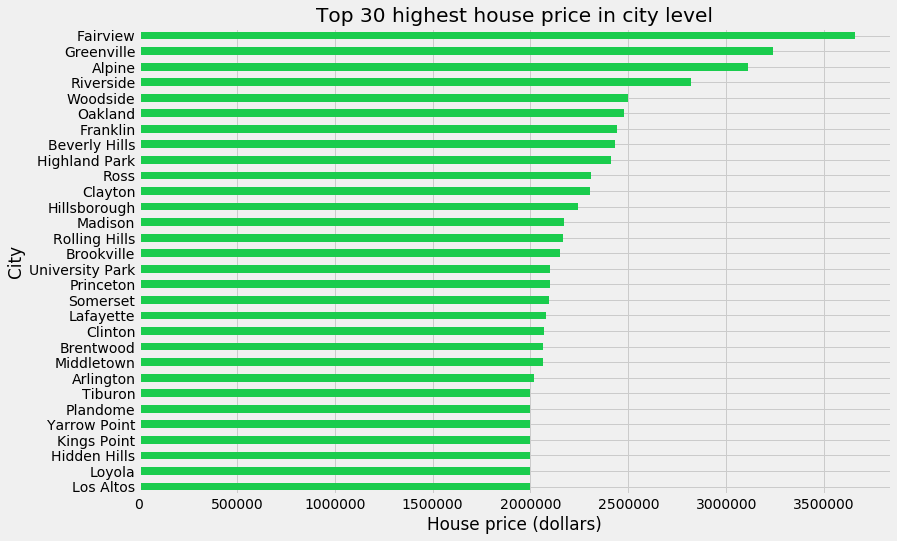

In [21]:
homev=df_with_longlati_R.groupby("City")["home_value"].sum()
homev=homev.sort_values().tail(30)
plt.style.use({'figure.figsize':(12, 8)})
fig,ax = plt.subplots()
homev.plot.barh(ax=ax,color=(0.1,0.8,0.3))
ax.set_title('Top 30 highest house price in city level')
ax.set_ylabel('City')
ax.set_xlabel('House price (dollars)')


We also show the descriptive statistics in state-level. We can check here New York is the third highest state in U.S. Moreover, from the standard deviation plot, s.d. of median house price in the state is as large as 400000 dollars.

C:\Users\hsian\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


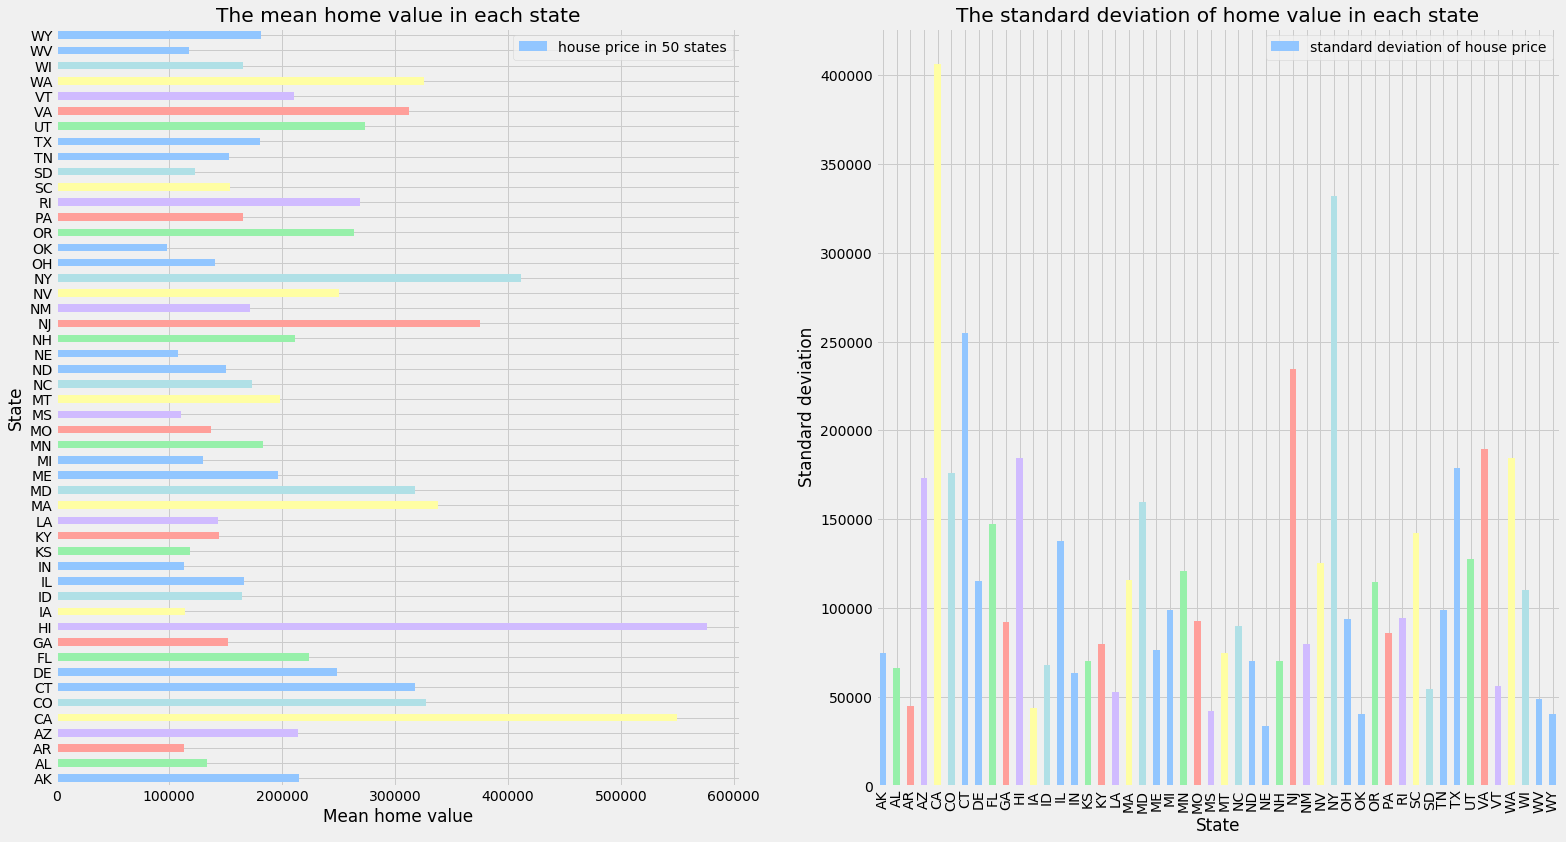

In [22]:
#state level
df5=df_with_longlati_R.groupby("state_id")["home_value"].agg({'mean':np.mean, 'standard deviation': np.std})

plt.style.use('seaborn-pastel')

#Create figure and axis objects. 
fig,ax= plt.subplots(nrows=1,ncols=2,figsize=(24,13))
df5['mean'].plot.barh(ax=ax[0])

#Add a horizontal bar chart of the number of firms
df5['standard deviation'].plot.bar(ax=ax[1])

ax[0].set_title('The mean home value in each state')
ax[0].set_ylabel('State')
ax[0].set_xlabel('Mean home value')
ax[0].legend(['house price in 50 states'])

ax[1].set_title('The standard deviation of home value in each state')
ax[1].set_xlabel('State')
ax[1].set_ylabel('Standard deviation')
ax[1].legend(['standard deviation of house price'])

### Correlation between variables

In [23]:
df_corr = df_with_longlati_R.iloc[:, 3:-10].corr()
df_corr

,home_value,age,associate degree,expense_medicare,house_ppl,time_to_work,built_year,density,inc,snap,...,elec_heat,startup_firm,small_firm,kitchen,plumbing,damaged_house,walk_to_work,publictransp_to_work,percent_ppl_unemployment,poorly_educated
home_value,1.000000,0.217394,-0.351257,0.230448,0.203070,0.337057,0.058980,0.229043,0.815482,-0.437377,...,-0.149546,0.121409,0.025530,0.014385,0.037019,0.001800,-0.032948,0.419310,-0.206577,-0.137238
age,0.217394,1.000000,-0.060073,0.826814,-0.459655,0.128847,-0.049562,-0.129998,0.430838,-0.348462,...,-0.054264,0.044730,0.155048,0.008912,0.040602,-0.148091,-0.183252,0.003334,-0.179920,-0.303195
associate degree,-0.351257,-0.060073,1.000000,-0.003211,-0.108045,-0.114342,0.070625,-0.216813,-0.351706,0.017536,...,0.017060,0.021607,0.127826,0.017168,0.014983,-0.061233,-0.088940,-0.323393,-0.005289,-0.258295
expense_medicare,0.230448,0.826814,-0.003211,1.000000,-0.504550,0.047381,-0.057172,-0.155035,0.476476,-0.487615,...,-0.117737,0.027338,0.150659,0.029413,0.075421,-0.213937,-0.078071,-0.013207,-0.294331,-0.459493
house_ppl,0.203070,-0.459655,-0.108045,-0.504550,1.000000,0.331742,0.176364,0.200710,-0.039000,0.061145,...,0.042969,0.157482,0.045338,0.033863,-0.066729,0.285263,-0.168583,0.133225,0.099730,0.432845
time_to_work,0.337057,0.128847,-0.114342,0.047381,0.331742,1.000000,0.118451,0.172112,0.300720,-0.204495,...,-0.035376,0.186290,0.197556,0.119757,0.051287,0.011403,-0.289918,0.389398,-0.008987,-0.032154
built_year,0.058980,-0.049562,0.070625,-0.057172,0.176364,0.118451,1.000000,-0.107254,0.060138,-0.106045,...,0.253672,0.083604,-0.019605,0.012788,-0.007776,0.018288,-0.145543,-0.118119,-0.049456,-0.002168
density,0.229043,-0.129998,-0.216813,-0.155035,0.200710,0.172112,-0.107254,1.000000,0.089148,0.016143,...,-0.070475,0.027026,-0.100459,-0.009167,0.027587,0.141188,0.083320,0.544463,0.039158,0.208760
inc,0.815482,0.430838,-0.351706,0.476476,-0.039000,0.300720,0.060138,0.089148,1.000000,-0.602688,...,-0.199284,0.091100,0.043244,0.045499,0.056088,-0.117030,-0.118039,0.358972,-0.351567,-0.359878
snap,-0.437377,-0.348462,0.017536,-0.487615,0.061145,-0.204495,-0.106045,0.016143,-0.602688,1.000000,...,0.239722,-0.090842,-0.125725,-0.108518,-0.136522,0.216992,0.134073,-0.091809,0.578742,0.436800


First, we plot the detailed correlation matrix.

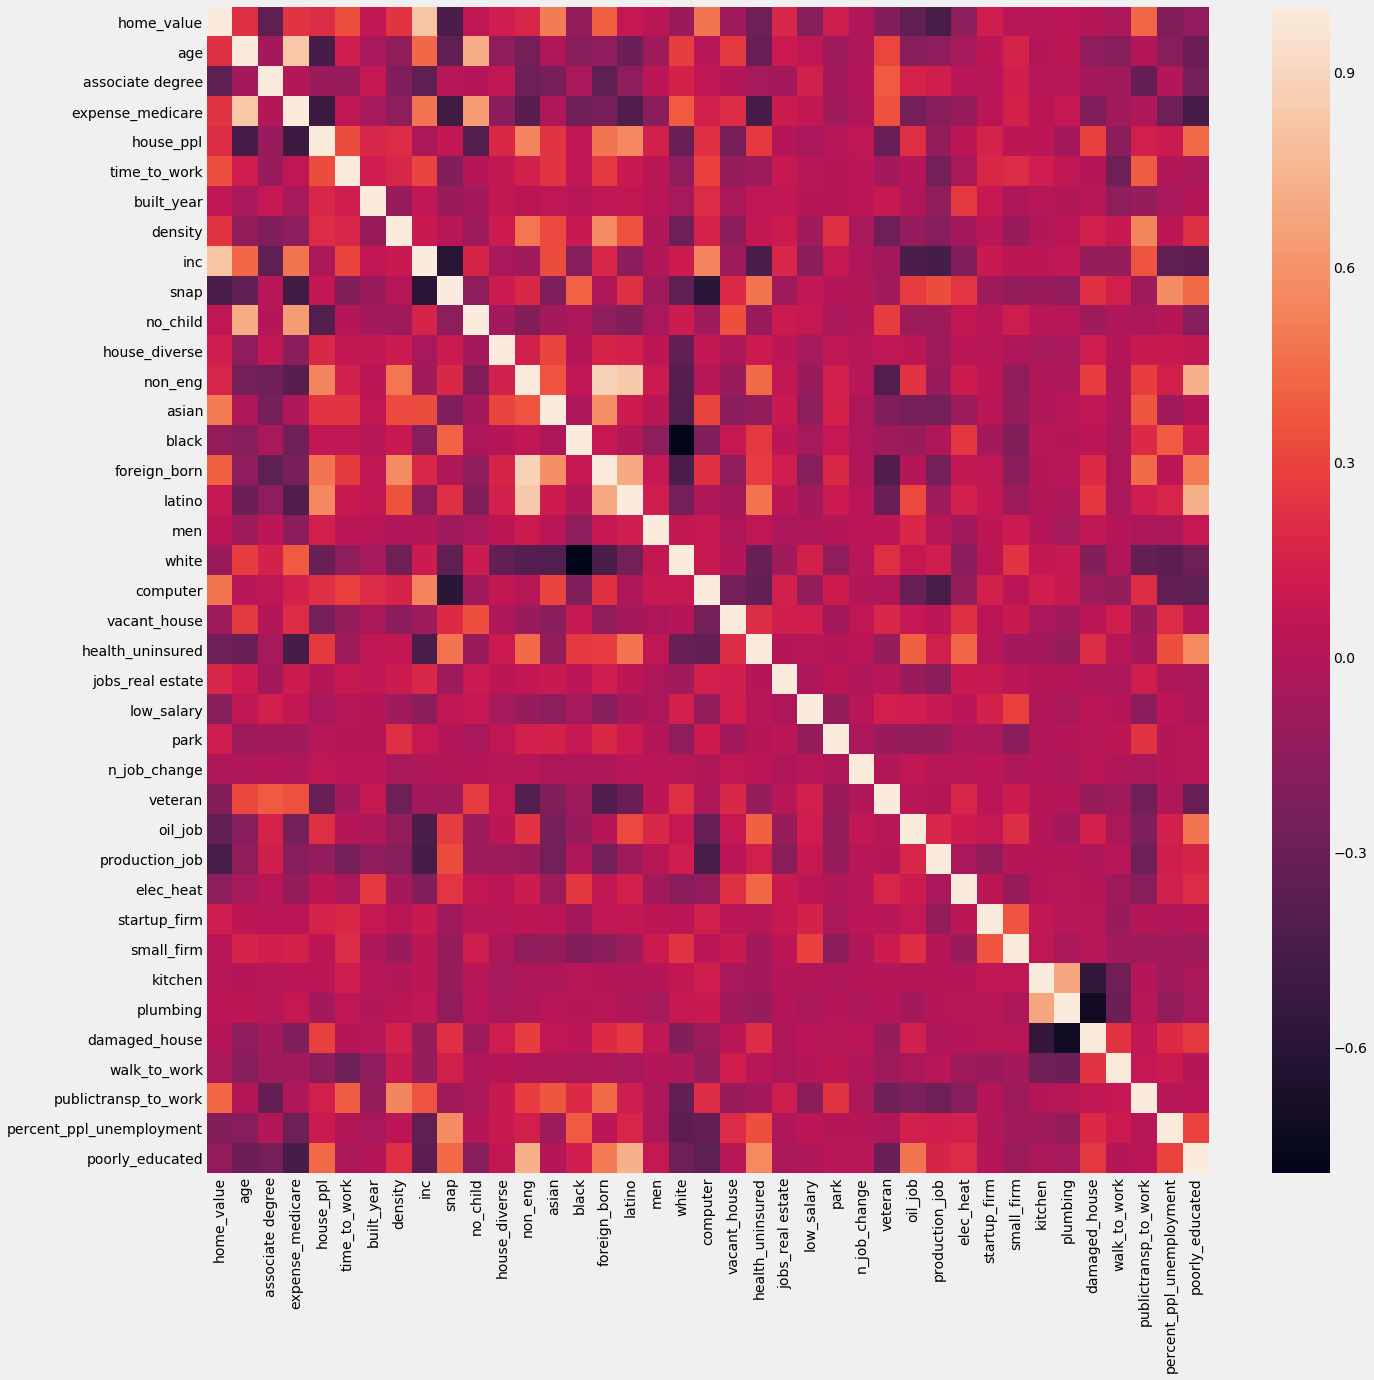

In [24]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr)

According to the correlation value, we choose 'inc', 'asian', and 'computer' - three most correlated with 'home_value' and draw the pairplot.

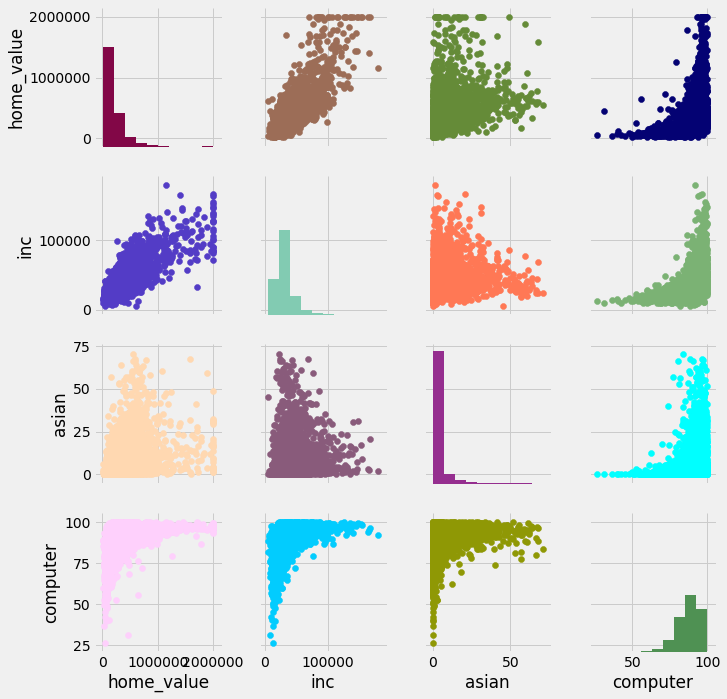

In [25]:
df4=df2.loc[:,["home_value","inc","asian","computer"]]
colors = iter(['xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue'])

def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    plt.hist(x, **kwargs)

g = sns.PairGrid(df4)
g.map_diag(my_hist)
g.map_offdiag(my_scatter)

# 4. Machine Learning Prediction

## 4.1 Model

In this section, we present the analysis with machine learning prediction. The model we exploit is Lasso regression since we need the interpretation for the coefficients which affect the regional housing value. The necessary packages for the Lasso model are imported below.

In [26]:
from sklearn.linear_model import LassoCV

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.metrics import mean_squared_error

## 4.2 Estimation

First, we divide the data into the response variable (Median House Value) and explanatory variables.

In [30]:
y = df_with_longlati_R['home_value']

In [31]:
x = df_with_longlati_R.iloc[:, 4:]
x

,age,associate degree,expense_medicare,house_ppl,time_to_work,built_year,density,inc,snap,no_child,...,FIPS_list_r,City_FIPS,city,state_id,county_fips,lat,lng,text,county_2 digit code,city_county_code
0,39.0,32.99,770.0,2.37,11.0,1979.0,3.04,38423.0,4.79,60.22,...,02,Sitka02,Sitka,AK,2220,57.2401,-135.3153,2220,2,Sitka02
1,38.0,36.20,770.0,2.53,16.0,1981.0,11.97,43276.0,8.03,55.36,...,02,Juneau02,Juneau,AK,2110,58.4546,-134.1739,2110,2,Juneau02
2,50.0,30.03,880.0,2.26,10.0,1977.0,0.98,31489.0,12.92,66.92,...,02,Wrangell02,Wrangell,AK,2275,56.3317,-132.0223,2275,2,Wrangell02
3,33.0,34.72,660.0,2.71,19.0,1981.0,173.71,39839.0,9.18,51.84,...,02,Anchorage02,Anchorage,AK,2020,61.1508,-149.1091,2020,2,Anchorage02
6,37.0,40.74,710.0,2.99,42.0,1997.0,3.08,23281.0,14.25,66.31,...,02,Willow02,Willow,AK,2170,61.8157,-149.7530,2170,2,Willow02
18,50.0,35.62,900.0,2.22,33.0,1997.0,3.20,33789.0,4.43,67.98,...,02,Susitna North02,Susitna North,AK,2170,62.1281,-149.8593,2170,2,Susitna North02
23,36.0,32.96,690.0,2.57,25.0,1984.0,1176.58,28793.0,18.53,57.34,...,12,Jacksonville12,Jacksonville,FL,12031,30.3322,-81.6749,12031,12,Jacksonville12
27,34.0,30.57,680.0,2.59,21.0,1979.0,1050.91,29581.0,14.46,52.54,...,40,Oklahoma City40,Oklahoma City,OK,40109,35.4676,-97.5137,40109,40,Oklahoma City40
32,33.0,23.46,590.0,2.67,27.0,1978.0,3829.26,31576.0,19.43,52.04,...,48,Houston48,Houston,TX,48201,29.7869,-95.3905,48201,48,Houston48
36,37.0,20.18,650.0,2.62,41.0,1949.0,27899.89,37693.0,21.84,57.84,...,36,New York36,New York,NY,36061,40.6943,-73.9249,36061,36,New York36


Next, to capture the prediction accuracy, we create the training and test datasets. As the test dataset, "train_test_split" function automatically chooses 10% of the data from overall sample.

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [33]:
X_test

,age,associate degree,expense_medicare,house_ppl,time_to_work,built_year,density,inc,snap,no_child,...,FIPS_list_r,City_FIPS,city,state_id,county_fips,lat,lng,text,county_2 digit code,city_county_code
17805,43.0,28.57,820.0,2.40,24.0,1950.0,1158.50,22833.0,13.29,65.90,...,55,Shullsburg55,Shullsburg,WI,55065,42.5733,-90.2347,55065,55,Shullsburg55
4878,45.0,25.78,750.0,2.28,22.0,1973.0,805.62,21722.0,19.67,52.93,...,51,Galax51,Galax,VA,51640,36.6660,-80.9176,51640,51,Galax51
11178,32.0,19.82,650.0,2.91,27.0,1973.0,932.46,13835.0,23.61,42.90,...,47,Monterey47,Monterey,TN,47141,36.1446,-85.2643,47141,47,Monterey47
18679,36.0,32.76,660.0,3.10,30.0,1989.0,1280.28,26625.0,20.25,45.71,...,17,Kingston17,Kingston,IL,17037,42.1008,-88.7619,17037,17,Kingston17
20873,34.0,33.96,720.0,2.51,22.0,1975.0,1262.61,17505.0,25.44,39.58,...,40,Fairland40,Fairland,OK,40115,36.7506,-94.8484,40115,40,Fairland40
4765,32.0,24.90,310.0,3.06,29.0,1979.0,629.65,14472.0,27.49,46.68,...,48,Hutchins48,Hutchins,TX,48113,32.6421,-96.7093,48113,48,Hutchins48
4456,40.0,39.62,660.0,2.23,18.0,1953.0,2085.34,22283.0,15.47,53.71,...,17,Dixon17,Dixon,IL,17103,41.8439,-89.4788,17103,17,Dixon17
23641,46.0,21.59,990.0,2.54,28.0,1947.0,1610.89,23774.0,12.40,71.60,...,42,Hyndman42,Hyndman,PA,42009,39.8207,-78.7214,42009,42,Hyndman42
7223,37.0,33.48,760.0,2.64,34.0,1994.0,1002.92,29327.0,19.37,54.41,...,22,Walker22,Walker,LA,22063,30.4850,-90.8658,22063,22,Walker22
2842,36.0,44.33,660.0,2.45,13.0,1961.0,1588.64,22785.0,29.20,52.04,...,41,Pendleton41,Pendleton,OR,41059,45.6755,-118.8209,41059,41,Pendleton41


In [34]:
Y_train

6655     138900.0
18292    103700.0
6995     262400.0
10238     93100.0
6085     402700.0
1562     797300.0
11272    585600.0
11479    131800.0
22537    141500.0
2706     169600.0
15010     52100.0
13227    412900.0
4495      88000.0
10799    333200.0
11442    505700.0
4439     177900.0
17538     80200.0
10585    221900.0
10236    896600.0
19238    112700.0
23988     80900.0
2049     168600.0
4108     180500.0
2680     221700.0
7473     334500.0
18473    772700.0
3282     117600.0
17724     86600.0
5193     206900.0
1300     151700.0
           ...   
13716     63500.0
2677      91600.0
2934     115700.0
14455    121100.0
7685     264500.0
8119     168300.0
3111      91400.0
10206     94300.0
12130    197700.0
10567    223700.0
26967     89300.0
826      150700.0
20516     60700.0
4236     207000.0
14156    149300.0
3206      86300.0
22356     96400.0
3783     259800.0
1048     236200.0
5183     252600.0
11696    192300.0
9813      81400.0
6723     165800.0
14485    118000.0
18362    1

To run the Lasso model, we need to standardize the explanatory variables.

In [35]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train.iloc[:, 1:-10])
X_test_std = scaler.fit_transform(X_test.iloc[:, 1:-10])
X_test_std

array([[-0.28926917,  0.23296605, -0.55713423, ..., -0.4256555 ,
        -1.60307596, -0.64689234],
       [-0.68542624, -0.24956681, -0.86336844, ..., -0.27244654,
         0.26943266,  1.71560174],
       [-1.53169726, -0.93889947,  0.74436113, ..., -0.4256555 ,
        -0.66225455,  2.39436291],
       ...,
       [ 0.46896695,  3.54176283, -0.22538051, ..., -0.4256555 ,
        -0.78404373, -0.22545257],
       [-0.78056073,  1.12909851, -0.53161472, ..., -0.29542788,
         1.26810393, -0.22950488],
       [ 0.09268873, -0.59423314, -0.3529781 , ..., -0.4256555 ,
         0.4490717 , -0.48277397]])

Next, using "LassoCV", we choose the optimal penalty (alpha) with ten fold cross validataion. In Lasso, alpha is an important parameter that shows how the model balance between the number of features (or explanatory variables) and the sum residual sum of squares (RSS). In words, we take into account the trade-off between over-fitting problem and the minimization of deviation of predicted values from actual values.

In [36]:
lasso_cv = LassoCV(alphas=None, cv=10) 
lasso_cv

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [37]:
#Cross validate and find the least α
lasso_cv.fit(X_train_std, Y_train) 

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

Here, we plot the results of cross varidation to choose the optimal alpha.

In [38]:
m_log_alphascv =  -np.log10(lasso_cv.alphas_)

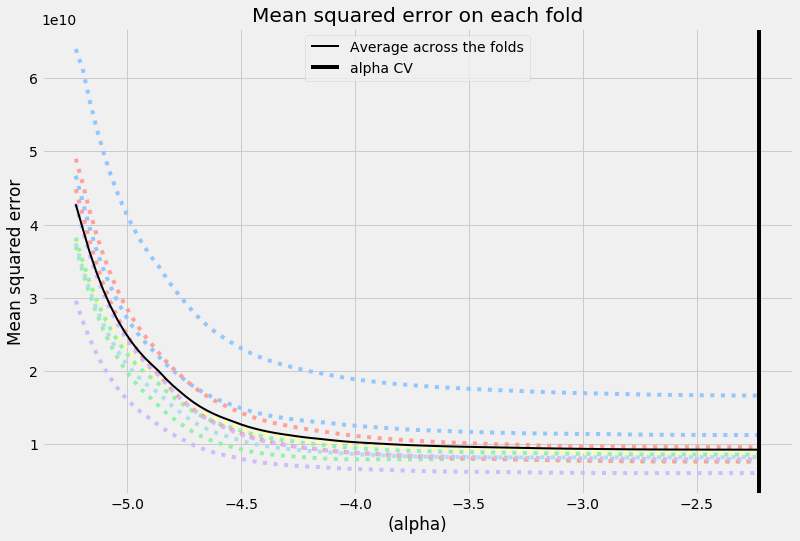

In [39]:
plt.figure()
plt.plot(m_log_alphascv, lasso_cv.mse_path_, ':')
plt.plot(m_log_alphascv, lasso_cv.mse_path_.mean(axis=-1), 'k',
label= 'Average across the folds', linewidth=2)
plt.axvline(-np.log10(lasso_cv.alpha_), linestyle=  '-', color= 'k',
label='alpha CV')
plt.legend()
plt.xlabel('(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
plt.show()

The optimal alpha is 168.38 for our dataset.

In [40]:
print(lasso_cv.alpha_) 

168.3802241069395


## 4.3 Prediction results

In this section, we present the prediction accuracy and analyze the coefficients of the model. Moreover, by calculating the difference between the predicted value and true value, we measure how the housing price in the city is over or under evaluated. 

Using the optimal alpha above, we run the lasso model and make the prediction.

In [41]:
#prediction
y_pred =lasso_cv.predict(X_test_std) 
y_pred

array([106784.99162928,  49860.75659688,  54436.77444677, ...,
       425655.84521284, 158108.75711116,  79217.55394721])

Next, we calculate the RMSE.

In [42]:
mse = mean_squared_error(Y_test, y_pred)
rmse = mse**(1/2)
print(rmse)

96629.40289836553


In the next plot, we compare the predicted value and true value. This plot shows that if the blue dots are on the green 45 degree points, the home value in that city is exactly the same as the value our model predicts. The overall model prediction is fairly good since most of the data are pretty close to the 45 degree points. 

We can see that some cities are highly over or under valued by looking at the differences between blue dot and green dot. We will show these cities on the map later.

In [43]:
fig = plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

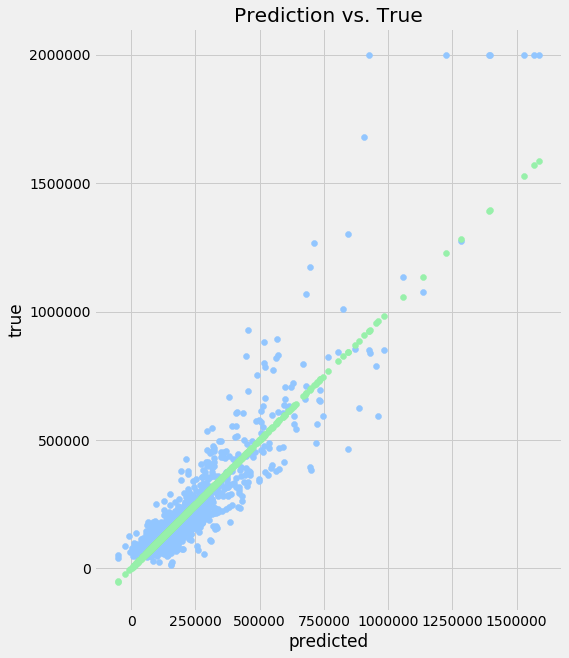

In [44]:
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(y_pred, Y_test) 
ax.scatter(y_pred,y_pred)
ax.set_title('Prediction vs. True')
ax.set_xlabel('predicted') 
ax.set_ylabel('true') 
ax.set_aspect('equal')
fig

Next, we check the regression results for the coefficients and try to interpret the results.

In [45]:
#estimated coefficients
lasso_cv_coef=list(lasso_cv.coef_) 
lasso_cv_coef

[8393.459459338828,
 -13343.50224523425,
 30087.865295030435,
 3566.053517361181,
 -2892.795115164113,
 4823.070950942181,
 168972.8198225242,
 2354.290898049749,
 6041.449621478021,
 10485.159599988167,
 -18656.958080295633,
 26308.37368091577,
 -16903.489329012435,
 24434.405190400186,
 9401.19755919769,
 -1030.7949397367452,
 -15494.086579805084,
 -7385.970731335308,
 11377.238303350436,
 -10048.651457158927,
 2522.932913449852,
 -3678.7689608933692,
 -0.0,
 -225.76201752886587,
 -4914.023830568033,
 -458.5157608852063,
 -113.73458289960327,
 4570.191004762093,
 3066.1925629957523,
 4490.9060958609125,
 -6770.42685747456,
 15492.380886286743,
 2469.138195800686,
 18708.354123307512,
 776.787822414739,
 5884.129219944426,
 4834.610915734776]

In [46]:
#estimated intercept
print(lasso_cv.intercept_) 

221229.34670515617


In [47]:
X_train.iloc[:, 1:-10].columns

Index(['associate degree', 'expense_medicare', 'house_ppl', 'time_to_work',
       'built_year', 'density', 'inc', 'snap', 'no_child', 'house_diverse',
       'non_eng', 'asian', 'black', 'foreign_born', 'latino', 'men', 'white',
       'computer', 'vacant_house', 'health_uninsured', 'jobs_real estate',
       'low_salary', 'park', 'n_job_change', 'veteran', 'oil_job',
       'production_job', 'elec_heat', 'startup_firm', 'small_firm', 'kitchen',
       'plumbing', 'damaged_house', 'walk_to_work', 'publictransp_to_work',
       'percent_ppl_unemployment', 'poorly_educated'],
      dtype='object')

In [48]:
coef = pd.DataFrame(lasso_cv_coef)
coef.index=X_train.iloc[:, 1:-10].columns
coef.columns=['coef_value']
coef

,coef_value
associate degree,8393.459459
expense_medicare,-13343.502245
house_ppl,30087.865295
time_to_work,3566.053517
built_year,-2892.795115
density,4823.070951
inc,168972.819823
snap,2354.290898
no_child,6041.449621
house_diverse,10485.159600


In [49]:
coef['abs_value']=coef["coef_value"].abs()
coef['zero']=0
coef

,coef_value,abs_value,zero
associate degree,8393.459459,8393.459459,0
expense_medicare,-13343.502245,13343.502245,0
house_ppl,30087.865295,30087.865295,0
time_to_work,3566.053517,3566.053517,0
built_year,-2892.795115,2892.795115,0
density,4823.070951,4823.070951,0
inc,168972.819823,168972.819823,0
snap,2354.290898,2354.290898,0
no_child,6041.449621,6041.449621,0
house_diverse,10485.159600,10485.159600,0


In [50]:
coef = coef.sort_values("abs_value",ascending=True)
coef

,coef_value,abs_value,zero
park,-0.000000,0.000000,0
production_job,-113.734583,113.734583,0
n_job_change,-225.762018,225.762018,0
oil_job,-458.515761,458.515761,0
publictransp_to_work,776.787822,776.787822,0
men,-1030.794940,1030.794940,0
snap,2354.290898,2354.290898,0
damaged_house,2469.138196,2469.138196,0
jobs_real estate,2522.932913,2522.932913,0
built_year,-2892.795115,2892.795115,0


In [51]:
coef_list = list(coef.index)
coef_list

['park',
 'production_job',
 'n_job_change',
 'oil_job',
 'publictransp_to_work',
 'men',
 'snap',
 'damaged_house',
 'jobs_real estate',
 'built_year',
 'startup_firm',
 'time_to_work',
 'low_salary',
 'small_firm',
 'elec_heat',
 'density',
 'poorly_educated',
 'veteran',
 'percent_ppl_unemployment',
 'no_child',
 'kitchen',
 'computer',
 'associate degree',
 'latino',
 'health_uninsured',
 'house_diverse',
 'vacant_house',
 'expense_medicare',
 'plumbing',
 'white',
 'black',
 'non_eng',
 'walk_to_work',
 'foreign_born',
 'asian',
 'house_ppl',
 'inc']

[Text(0,0,'park'),
 Text(0,0,'production_job'),
 Text(0,0,'n_job_change'),
 Text(0,0,'oil_job'),
 Text(0,0,'publictransp_to_work'),
 Text(0,0,'men'),
 Text(0,0,'snap'),
 Text(0,0,'damaged_house'),
 Text(0,0,'jobs_real estate'),
 Text(0,0,'built_year'),
 Text(0,0,'startup_firm'),
 Text(0,0,'time_to_work'),
 Text(0,0,'low_salary'),
 Text(0,0,'small_firm'),
 Text(0,0,'elec_heat'),
 Text(0,0,'density'),
 Text(0,0,'poorly_educated'),
 Text(0,0,'veteran'),
 Text(0,0,'percent_ppl_unemployment'),
 Text(0,0,'no_child'),
 Text(0,0,'kitchen'),
 Text(0,0,'computer'),
 Text(0,0,'associate degree'),
 Text(0,0,'latino'),
 Text(0,0,'health_uninsured'),
 Text(0,0,'house_diverse'),
 Text(0,0,'vacant_house'),
 Text(0,0,'expense_medicare'),
 Text(0,0,'plumbing'),
 Text(0,0,'white'),
 Text(0,0,'black'),
 Text(0,0,'non_eng'),
 Text(0,0,'walk_to_work'),
 Text(0,0,'foreign_born'),
 Text(0,0,'asian'),
 Text(0,0,'house_ppl'),
 Text(0,0,'inc')]

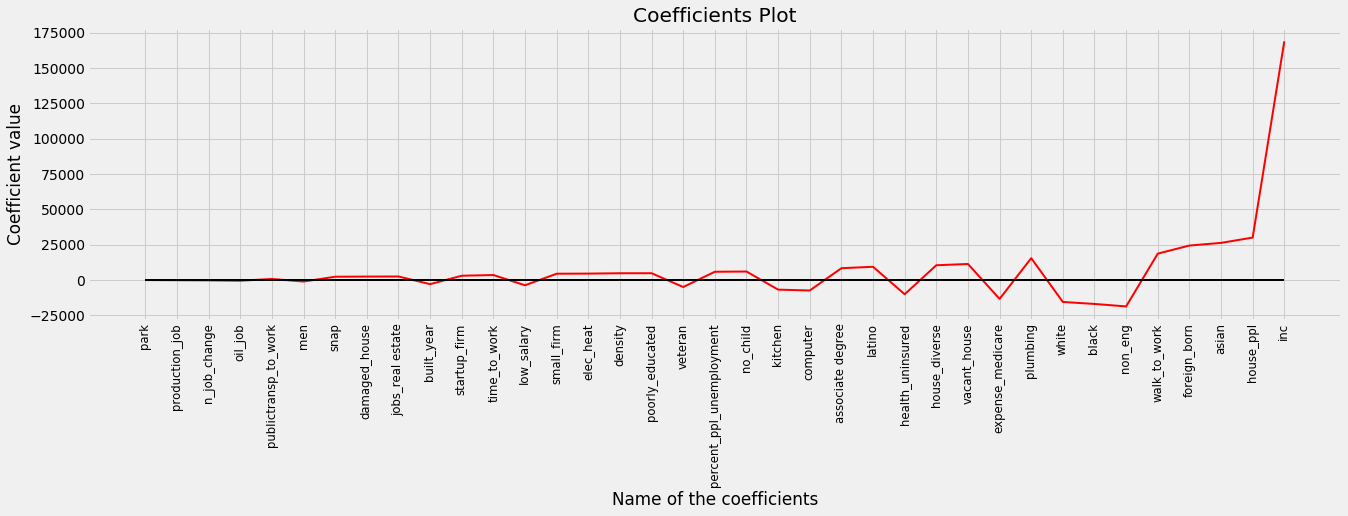

In [52]:
fig,ax = plt.subplots()
coef['coef_value'].plot(lw=2,figsize=(20,5),color='red')
coef['zero'].plot(lw=2,figsize=(20,5),color='black')
ax.set_title('Coefficients Plot')
ax.set_xlabel('Name of the coefficients')
ax.set_ylabel('Coefficient value')
ax.set_xticks(np.arange(len(coef_list)))
ax.set_xticklabels(coef_list, rotation=90, fontsize='small')

From the plot above, we can point out some interesting features. Here, Ligus and Paternek (2016) suggest that attributes could be classified into four categories: Structural (S), Neighborhood (N), Location (L), and Environmental (E). Structural attributes (S) are related to inherent characteristics of the property, such as total floor area, number of rooms, and age of the building. Neighborhood attributes (N) include security, social status of the area, educational or cultural quality. Location attributes (L) consider distance to public services or shopping areas. Environmental attributes (E) are related to pollution or noise level. In our result, there is no variable agrees with the definition of the Environmental attributes, so here we only discuss the first three attributes.

First, for the S attribute, the percentage of household with complete plumbing facilities (plumbing) and those with electric heating system (elec_heat), and all have positive impact on the home value of the house. This is very reasonable since more facilities will offer higher value for the house.

For the N attribute, 'jobs_real estate' which implies percent of jobs in real estate has positive influence on our house value which could be interpreted as the fact that if the real estate market is highly prosperous in certain area, then the house price may be higher. And estimated percent of people with some college or an Associate's degree (associate_degree) also generates positive effect on the house price, which is easy to see with more people are well educated, the productivity of society will promote, and make great contribution to economy growth, which then lift the income and the house price. Other great indicators of economic boom and bust that either boost or decrease the home value are also obvious and easy to understand. Those with positive relationship with home value include income per capita (inc), percent of jobs at firms that are 0-3 years old (startup_firm), and percent of jobs at firms with fewer than 50 employees (small_firm). On the other hand, those with negative effect include percent of workers earning $15,000 or less annually from their primary job (low_salary), estimated percent of all people without health insurance (health_uninsured), and average annual dollars spent out of pocket per person on medical care (expense_medicare). For the density issue, estimated number of people per square mile (density), estimated percent of all people who were Hispanic or Latino (latino), estimated percent of all people who were Asian (asian) and other racial and ethnic group produce positive effect. This suggests that the cities where people gathering tend to have higher home value. Another interesting variable is that higher percentage of more than two ethnicities living in one household (house_diverse) also increases the home value. Overall, the result shows that the the mobility and immigration have positive impact on house price. 

Further, when it comes to L attribute, 'publictransp_to_work', which represents estimated percent of workers who commuted to work using public transportation, has positive impact on the house price because home value will be increased if it is located around a transport station. And the positive coefficient estimated percent of workers who commuted to work by walking in (walk_to_work) shows that the closer to the workplace, the higher the house value.

### Prediction visualization

In this section, we draw a map to visualize the over or under evaluated cities based on our model prediction. We measure this by the difference between true home value and predicted home value on the test data (blue dots - green dots in the figure titled "Prediction vs. True" in section 4.3).

In [53]:
error = Y_test-y_pred
error = pd.DataFrame(error)

In [54]:
error_df = X_test.merge(error,right_index=True,left_index=True)
error_df

,age,associate degree,expense_medicare,house_ppl,time_to_work,built_year,density,inc,snap,no_child,...,City_FIPS,city,state_id,county_fips,lat,lng,text,county_2 digit code,city_county_code,home_value
17805,43.0,28.57,820.0,2.40,24.0,1950.0,1158.50,22833.0,13.29,65.90,...,Shullsburg55,Shullsburg,WI,55065,42.5733,-90.2347,55065,55,Shullsburg55,-16784.991629
4878,45.0,25.78,750.0,2.28,22.0,1973.0,805.62,21722.0,19.67,52.93,...,Galax51,Galax,VA,51640,36.6660,-80.9176,51640,51,Galax51,51239.243403
11178,32.0,19.82,650.0,2.91,27.0,1973.0,932.46,13835.0,23.61,42.90,...,Monterey47,Monterey,TN,47141,36.1446,-85.2643,47141,47,Monterey47,60463.225553
18679,36.0,32.76,660.0,3.10,30.0,1989.0,1280.28,26625.0,20.25,45.71,...,Kingston17,Kingston,IL,17037,42.1008,-88.7619,17037,17,Kingston17,-29152.418776
20873,34.0,33.96,720.0,2.51,22.0,1975.0,1262.61,17505.0,25.44,39.58,...,Fairland40,Fairland,OK,40115,36.7506,-94.8484,40115,40,Fairland40,5736.063402
4765,32.0,24.90,310.0,3.06,29.0,1979.0,629.65,14472.0,27.49,46.68,...,Hutchins48,Hutchins,TX,48113,32.6421,-96.7093,48113,48,Hutchins48,75976.945014
4456,40.0,39.62,660.0,2.23,18.0,1953.0,2085.34,22283.0,15.47,53.71,...,Dixon17,Dixon,IL,17103,41.8439,-89.4788,17103,17,Dixon17,-2979.131272
23641,46.0,21.59,990.0,2.54,28.0,1947.0,1610.89,23774.0,12.40,71.60,...,Hyndman42,Hyndman,PA,42009,39.8207,-78.7214,42009,42,Hyndman42,-17263.057030
7223,37.0,33.48,760.0,2.64,34.0,1994.0,1002.92,29327.0,19.37,54.41,...,Walker22,Walker,LA,22063,30.4850,-90.8658,22063,22,Walker22,-28129.995182
2842,36.0,44.33,660.0,2.45,13.0,1961.0,1588.64,22785.0,29.20,52.04,...,Pendleton41,Pendleton,OR,41059,45.6755,-118.8209,41059,41,Pendleton41,-21349.077605


In [55]:
error_df = error_df.rename(columns={'home_value': 'error'})
error_df

,age,associate degree,expense_medicare,house_ppl,time_to_work,built_year,density,inc,snap,no_child,...,City_FIPS,city,state_id,county_fips,lat,lng,text,county_2 digit code,city_county_code,error
17805,43.0,28.57,820.0,2.40,24.0,1950.0,1158.50,22833.0,13.29,65.90,...,Shullsburg55,Shullsburg,WI,55065,42.5733,-90.2347,55065,55,Shullsburg55,-16784.991629
4878,45.0,25.78,750.0,2.28,22.0,1973.0,805.62,21722.0,19.67,52.93,...,Galax51,Galax,VA,51640,36.6660,-80.9176,51640,51,Galax51,51239.243403
11178,32.0,19.82,650.0,2.91,27.0,1973.0,932.46,13835.0,23.61,42.90,...,Monterey47,Monterey,TN,47141,36.1446,-85.2643,47141,47,Monterey47,60463.225553
18679,36.0,32.76,660.0,3.10,30.0,1989.0,1280.28,26625.0,20.25,45.71,...,Kingston17,Kingston,IL,17037,42.1008,-88.7619,17037,17,Kingston17,-29152.418776
20873,34.0,33.96,720.0,2.51,22.0,1975.0,1262.61,17505.0,25.44,39.58,...,Fairland40,Fairland,OK,40115,36.7506,-94.8484,40115,40,Fairland40,5736.063402
4765,32.0,24.90,310.0,3.06,29.0,1979.0,629.65,14472.0,27.49,46.68,...,Hutchins48,Hutchins,TX,48113,32.6421,-96.7093,48113,48,Hutchins48,75976.945014
4456,40.0,39.62,660.0,2.23,18.0,1953.0,2085.34,22283.0,15.47,53.71,...,Dixon17,Dixon,IL,17103,41.8439,-89.4788,17103,17,Dixon17,-2979.131272
23641,46.0,21.59,990.0,2.54,28.0,1947.0,1610.89,23774.0,12.40,71.60,...,Hyndman42,Hyndman,PA,42009,39.8207,-78.7214,42009,42,Hyndman42,-17263.057030
7223,37.0,33.48,760.0,2.64,34.0,1994.0,1002.92,29327.0,19.37,54.41,...,Walker22,Walker,LA,22063,30.4850,-90.8658,22063,22,Walker22,-28129.995182
2842,36.0,44.33,660.0,2.45,13.0,1961.0,1588.64,22785.0,29.20,52.04,...,Pendleton41,Pendleton,OR,41059,45.6755,-118.8209,41059,41,Pendleton41,-21349.077605


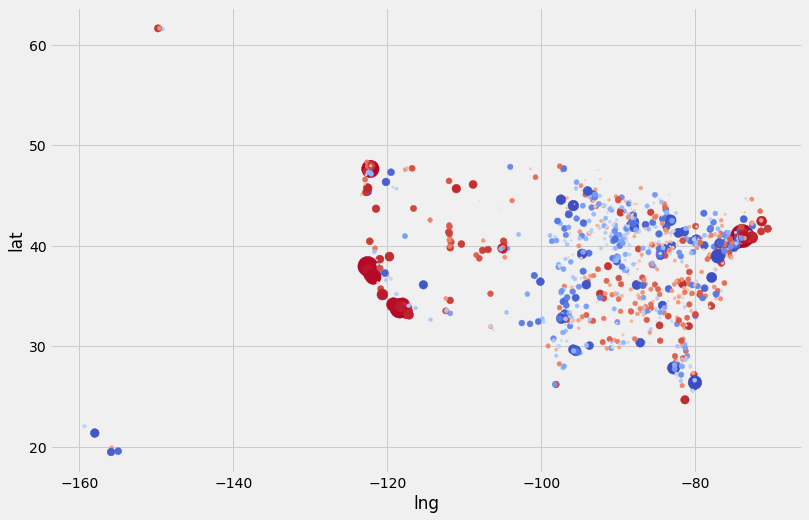

In [56]:
import matplotlib as mpl
cmap = plt.cm.coolwarm
n = mpl.colors.Normalize()
s = error_df['error'].rank(pct='TRUE')
error_df.plot.scatter(x='lng',y='lat',s=error_df['error'].abs()*0.0005,color=cmap(n(s.values)))

The figure above shows that the cities in the west coast are evaluated higher than our model. In these areas, people's expectation for higher future home value may be pushing the actual housing price higher than our model, which only use the current real variables such as income of the region, time to go to work and the ratio of the foreign people. On the other hand, the under-evaluated cities are located mostly in the inland area such as Texas and Michigan.

Next, we show the top 10 over evaluated cities based on our model. The most over-evaluated city is Alpine. This city is about 35 minutes from Manhattan and it is luxury residential area containing a number of golf courses. All of the other over evaluated cities in the top 10 list are located in the west coast.

In [57]:
error_df_sort = error_df.sort_values('error', ascending=False)

In [58]:
error_df_sort.iloc[0:10,[-9,-8,-1]]

,city,state_id,error
3893,Alpine,NJ,1.075155e+06
16102,Ross,CA,7.735692e+05
8446,Palos Verdes Estates,CA,7.725323e+05
24213,Yarrow Point,WA,6.085029e+05
15970,Monte Sereno,CA,6.041747e+05
10363,Larkspur,CA,5.520876e+05
8290,Corte Madera,CA,4.777489e+05
7311,La Selva Beach,CA,4.756481e+05
6268,Hillsborough,CA,4.725881e+05
2477,Lafayette,CA,4.594844e+05


We also check the result for the New York City. Despite the fact that New York City is one of the most expensive city in terms of the residence, the error is actually within the 1 sigma band (Note that the RMSE of our model is 96,629). Thus, we can say that NYC is slightly over evaluated but not so significantly over evaluated, considering the high income level of the people living there or the housing demands from people all over the world.

In [59]:
error_df_sort.loc[error_df_sort["city"]=="New York",:]

,age,associate degree,expense_medicare,house_ppl,time_to_work,built_year,density,inc,snap,no_child,...,City_FIPS,city,state_id,county_fips,lat,lng,text,county_2 digit code,city_county_code,error
36,37.0,20.18,650.0,2.62,41.0,1949.0,27899.89,37693.0,21.84,57.84,...,New York36,New York,NY,36061,40.6943,-73.9249,36061,36,New York36,65190.824244


Last, we check the map for the training data set. The result is similar as the one with test data. The cities in the west coast tends to be evaluated higher than our model, and cities located in the inland area tend to be under-evaluated.

In [60]:
y_pred_train =lasso_cv.predict(X_train_std) 
y_pred_train

array([ 54646.1560043 , 126158.56169276, 333489.54292293, ...,
        85172.6182042 , 221461.04017677, 238757.28001473])

In [61]:
error_train = Y_train-y_pred_train
error_train = pd.DataFrame (error_train)

In [62]:
error_train_df = X_train.merge(error_train,right_index=True,left_index=True)
error_train_df

,age,associate degree,expense_medicare,house_ppl,time_to_work,built_year,density,inc,snap,no_child,...,City_FIPS,city,state_id,county_fips,lat,lng,text,county_2 digit code,city_county_code,home_value
6655,34.0,22.56,640.0,2.66,26.0,1976.0,1062.15,18015.0,32.34,48.98,...,Bellwood51,Bellwood,VA,51041,37.4060,-77.4363,51041,51,Bellwood51,84253.843996
18292,41.0,37.98,890.0,2.32,29.0,1957.0,504.04,26142.0,9.09,62.99,...,Mulliken26,Mulliken,MI,26045,42.7630,-84.8963,26045,26,Mulliken26,-22458.561693
6995,40.0,29.15,700.0,2.55,38.0,1953.0,3013.28,37355.0,11.35,56.82,...,Beacon36,Beacon,NY,36027,41.5036,-73.9655,36027,36,Beacon36,-71089.542923
10238,43.0,39.09,840.0,2.37,20.0,1972.0,2213.44,26960.0,15.36,63.73,...,Flatwoods21,Flatwoods,KY,21089,38.5211,-82.7194,21089,21,Flatwoods21,-34998.919963
6085,41.0,25.94,870.0,2.71,35.0,1978.0,2326.98,46909.0,1.98,55.15,...,West Freehold34,West Freehold,NJ,34025,40.2324,-74.2943,34025,34,West Freehold34,17947.998153
1562,41.0,26.06,780.0,2.54,34.0,1963.0,7394.57,48791.0,6.07,54.05,...,Alameda06,Alameda,CA,6001,37.7670,-122.2673,6001,6,Alameda06,205733.878253
11272,46.0,10.77,860.0,2.95,25.0,1987.0,381.69,107639.0,0.66,54.61,...,Bentleyville39,Bentleyville,OH,39035,41.4122,-81.4121,39035,39,Bentleyville39,-446515.228369
11479,37.0,35.58,780.0,2.22,28.0,1974.0,677.29,25577.0,16.63,51.33,...,Pleasantville19,Pleasantville,IA,19125,41.3864,-93.2728,19125,19,Pleasantville19,43528.721196
22537,37.0,38.61,700.0,2.27,23.0,1995.0,4188.61,27445.0,13.14,56.50,...,Hallam42,Hallam,PA,42133,40.0024,-76.6042,42133,42,Hallam42,-2831.847852
2706,32.0,32.92,740.0,2.38,13.0,1979.0,2604.75,29382.0,9.68,52.45,...,Kearney31,Kearney,NE,31019,40.7008,-99.0847,31019,31,Kearney31,26826.593277


In [63]:
error_train_df = error_train_df.rename(columns={'home_value': 'error_train'})
error_train_df

,age,associate degree,expense_medicare,house_ppl,time_to_work,built_year,density,inc,snap,no_child,...,City_FIPS,city,state_id,county_fips,lat,lng,text,county_2 digit code,city_county_code,error_train
6655,34.0,22.56,640.0,2.66,26.0,1976.0,1062.15,18015.0,32.34,48.98,...,Bellwood51,Bellwood,VA,51041,37.4060,-77.4363,51041,51,Bellwood51,84253.843996
18292,41.0,37.98,890.0,2.32,29.0,1957.0,504.04,26142.0,9.09,62.99,...,Mulliken26,Mulliken,MI,26045,42.7630,-84.8963,26045,26,Mulliken26,-22458.561693
6995,40.0,29.15,700.0,2.55,38.0,1953.0,3013.28,37355.0,11.35,56.82,...,Beacon36,Beacon,NY,36027,41.5036,-73.9655,36027,36,Beacon36,-71089.542923
10238,43.0,39.09,840.0,2.37,20.0,1972.0,2213.44,26960.0,15.36,63.73,...,Flatwoods21,Flatwoods,KY,21089,38.5211,-82.7194,21089,21,Flatwoods21,-34998.919963
6085,41.0,25.94,870.0,2.71,35.0,1978.0,2326.98,46909.0,1.98,55.15,...,West Freehold34,West Freehold,NJ,34025,40.2324,-74.2943,34025,34,West Freehold34,17947.998153
1562,41.0,26.06,780.0,2.54,34.0,1963.0,7394.57,48791.0,6.07,54.05,...,Alameda06,Alameda,CA,6001,37.7670,-122.2673,6001,6,Alameda06,205733.878253
11272,46.0,10.77,860.0,2.95,25.0,1987.0,381.69,107639.0,0.66,54.61,...,Bentleyville39,Bentleyville,OH,39035,41.4122,-81.4121,39035,39,Bentleyville39,-446515.228369
11479,37.0,35.58,780.0,2.22,28.0,1974.0,677.29,25577.0,16.63,51.33,...,Pleasantville19,Pleasantville,IA,19125,41.3864,-93.2728,19125,19,Pleasantville19,43528.721196
22537,37.0,38.61,700.0,2.27,23.0,1995.0,4188.61,27445.0,13.14,56.50,...,Hallam42,Hallam,PA,42133,40.0024,-76.6042,42133,42,Hallam42,-2831.847852
2706,32.0,32.92,740.0,2.38,13.0,1979.0,2604.75,29382.0,9.68,52.45,...,Kearney31,Kearney,NE,31019,40.7008,-99.0847,31019,31,Kearney31,26826.593277


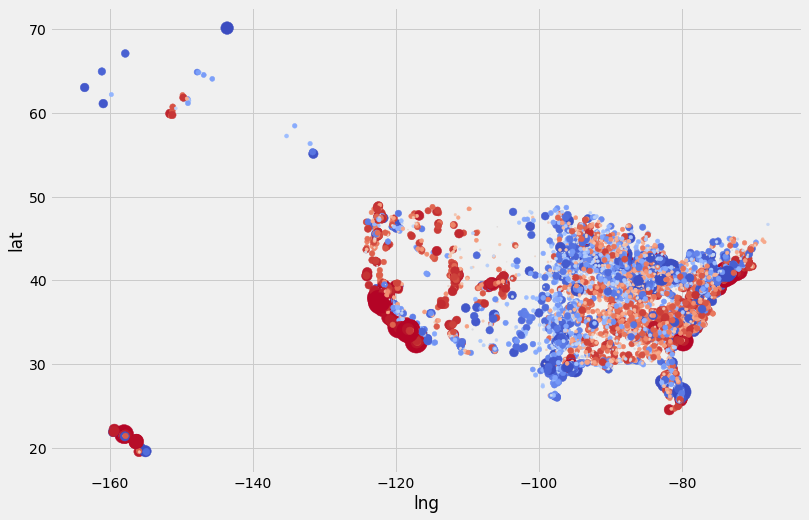

In [64]:
import matplotlib as mpl
cmap = plt.cm.coolwarm
n_train = mpl.colors.Normalize()
s = error_train_df['error_train'].rank(pct='TRUE')
error_train_df.plot.scatter(x='lng',y='lat',s=error_train_df['error_train'].abs()*0.0005,color=cmap(n_train(s.values)))

# 5. Conclusion and Discussion

We establish a model to predict the fair housing value based on the detailed regional U.S. data using machine learning technique Lasso regression. The innovation lie in using cross-section data for prediction and the application of Lasso regression in the housing market. Our model only contains current real variables and hence rules out people's expectation, which is the main factor causing housing boom. The result shows important variables that explain the housing price, including income, the average number of a household, the ratio of foreign-born people, and the time spent to go to work. The regions that are relatively over-priced compared to the fair value are mostly located in the west coast while the under-valued ones are mainly in the inland regions. Moreover, despite the fact that New York City is one of the most expensive city in terms of the residence, the error is actually within the 1 standard deviation and real estate is not significantly over-valued. Considering the high income level of the people living there or the housing demands from people all over the world, this shows interesting implication for investors and the policymakers.

The caveat in our model is that we may not be able to detect the housing bubble if the housing prices are rising or falling with the same rate in all areas in the United State. We have to bear in mind that our model is only useful to detect the over or under valued regions compared to other regions. Moreover, we have to improve our prediction accuracy (RMSE). In our model, we are not considering the connection between regions. For example, if one city's housing price is rising and over evaluated, it may affect the cities with close proximity. In the future research, we could add more variables such as the geographical information or the weather measurement, which may be relevant to the living quality and the home value. We can also exploit the non-linear machine learning method such as K Nearest-Neighbor to consider the geographical closeness.

# 6. References

* Calhoun CA, “Property Valuation Methods and Data in the United States”, Housing Finance International, 16(2), (2001), pp.12–23.
* Collins, A., Fan, J., & Mahabir, A. (2019). Using a LASSO approach to analyse the determinants of measured and ‘natural’suicide rates (No. 2019/04).
* Cranfield, J. A., Eales, J. S., Hertel, T. W., & Preckel, P. V. (2003). Model selection when estimating and predicting consumer demands using international, cross section data. Empirical Economics, 28(2), 353-364.
* Khalid K, Mohamed I and Abdullah NA, “An Additive Outlier Detection Procedure in Random Coefficient Autoregressive Mod- els”, AIP Conference Proceedings, 1682, (2015), 050017.
* Ligus M, Peternek P. Measuring structural, location and environmental effects: A hedonic analysis of housing market in Wroclaw, Poland. In: Kapounek S, Krutilova V, editors. Procedia - Social and Behavioral Sciences I, Volume 220; 2016. p. 251-260.
* Lu, S., Li, Z., Qin, Z., Yang, X., & Goh, R. S. M. (2017, December). A hybrid regression technique for house prices prediction. In 2017 IEEE International Conference on Industrial Engineering and Engineering Management (IEEM) (pp. 319-323). IEEE.
* Mak S, Choy L & Ho W, “Quantile Regression Estimates of Hong Kong Real Estate Prices”, Urban Studies, 47(11), (2010), pp.2461– 2472.
* Meinshausen N & Bühlmann P, “High-dimensional graphs and var- iable selection with the Lasso”, The annals of statistics, 34(3), (2006), pp.1436–1462.
* Mian, A., & Sufi, A. (2015). House of debt: How they (and you) caused the Great Recession, and how we can prevent it from happening again. University of Chicago Press.
* Mohamed I, Khalid K And Yahya MS, “Combined Estimating Function for Random Coefficient Models with Correlated Errors”, Communications In Statistics—Theory And Methods, 45(4), (2016), pp.967-975.
* Pasha GR & Shah MA, “Application of Ridge regression to multi- collinear data”, Journal of Research Science, 15(1), (2004), pp.97– 106.
* Plakandaras, V., Gupta, R., Gogas, P., & Papadimitriou, T. (2015). Forecasting the US real house price index. Economic Modelling, 45, 259-267.
* Risse, M., & Kern, M. (2016). Forecasting house-price growth in the Euro area with dynamic model averaging. The North American Journal of Economics and Finance, 38, 70-85.
* Rusiman MS, Hau OC, Abdullah AW, Sufahani SF, Azmi NA, “An Analysis of Time Series for the Prediction of Barramundi (Ikan Siakap) Price in Malaysia”, Far East Journal of Mathematical Sci- ences, 102(9), (2017) pp.2081-2093.
* Xin, S. J., & Khalid, K. (2018). Modelling House Price Using Ridge Regression and Lasso Regression. International Journal of Engineering & Technology, 7(4.30), 498-501.